
### About the dataset

Company's HR department wants to predict whether some employees would leave the company in the next 2 years.


Attributes Information:
   - **Education**     Employee's educational level
   - **JoiningYear**       Year of joining the company
   - **City**    City office where posted
   - **PaymentTier**     Payment tier(1: HIGHEST 2: MID LEVEL 3:LOWEST)
   - **Age**      current age of the employee
   - **Gender**       Gender of the employee
   - **EverBenched**      Ever kept out of projects for 1 month or more
   - **ExperienceInCurrentDomain**      Experience in current field
   - **LeaveOrNot**      Whether employee leaves the company in next 2 years
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### the top 8 elements in df. 

In [2]:
df = pd.read_csv("Employee.csv")
df.head(8)

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,3,34,1,0,0,0
1,1,2013,1,28,2,0,3,1
2,1,2014,3,38,2,0,2,0
3,2,2016,3,27,1,0,5,1
4,2,2017,3,24,1,1,2,1
5,1,2016,3,22,1,0,0,0
6,1,2015,3,38,1,0,0,0
7,1,2016,3,34,2,0,2,1


### NO. of rows and cloumns

In [3]:
#Your code here
df.shape

(4653, 8)

#Num of rows: [4653]
#Num of cloumns: [8]

### missing values


In [4]:
#Your code here: The percentage of missing values per variable 
missingValues = (df.isnull().sum()/df.isnull().count())*100
print(missingValues)

Education                    0.0
JoiningYear                  0.0
PaymentTier                  0.0
Age                          0.0
Gender                       0.0
EverBenched                  0.0
ExperienceInCurrentDomain    0.0
LeaveOrNot                   0.0
dtype: float64


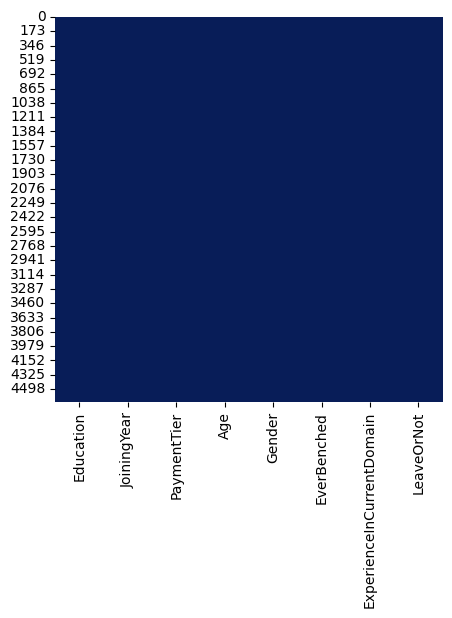

In [5]:
#Your code here: Visulaization of missing values
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

### the probability of leaving the company

In [6]:
p_leavingTheCompany = float(df.LeaveOrNot.sum())/df.LeaveOrNot.count()
print('The probability of leaving the company:', p_leavingTheCompany)

The probability of leaving the company: 0.3438641736514077


### the probability of not leaving the company

In [7]:
p_notLeavingTheCompany = 1 - p_leavingTheCompany
print('The probability of not leaving the company:', p_notLeavingTheCompany)

The probability of not leaving the company: 0.6561358263485924


###  bar chart to visulaize both probabilitiesy

<AxesSubplot: >

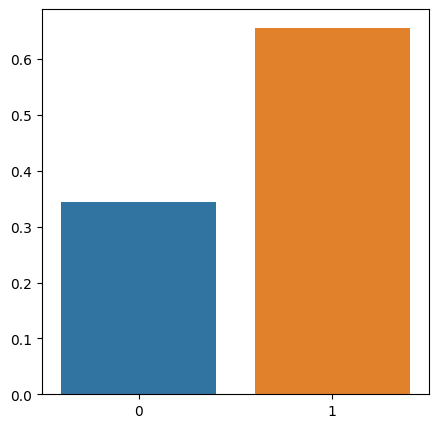

In [8]:
x1 = df['LeaveOrNot'].value_counts().index
y1 = [p_leavingTheCompany, p_notLeavingTheCompany]

fig = plt.figure(figsize=(5, 5))
sns.barplot(x=x1 ,y=y1 ,data=df)

### the probability that an employee with Masters degree leaving a company

In [9]:
print("The probability that an employee with masters degree leaving a company: " , float(df[df.Education == 2 ].LeaveOrNot.sum())/df[df.Education == 2 ].Education.count())

The probability that an employee with masters degree leaving a company:  0.4879725085910653


[0.48]

### the corelation between LeaveOrNot and all of the other features

<AxesSubplot: >

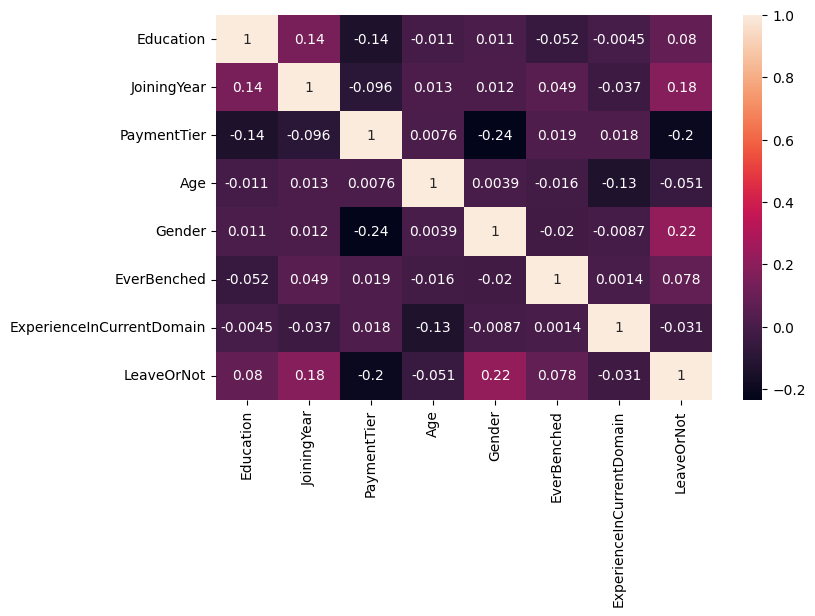

In [10]:
#Your code here 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

### the feature that have strongest postive corelation and strongest negative corelation.

[The strongest postive corelation = 0.22]

[The strongest negative corelation = -0.24]

###  Split train_df into: X_train, X_test, y_train, y_test, using all features (70% training, 30% testing).¶

In [11]:
#Your code here 
X = df.drop('LeaveOrNot',axis=1)
y = df['LeaveOrNot']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3257, 7) (1396, 7) (3257,) (1396,)


### A Logistic Regression model to predict target.

In [12]:
#Your code here 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
Y_pred = logreg.predict(X_test) 

###  predict the leave or not using the testing set of the above.

In [13]:
#Your code here 
y_pred = logreg.predict(X_test)

###  the accuracy of the model using testing set. 

In [14]:
#Your code here 
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("The accuracy of the model using testing set: ",acc_log)

The accuracy of the model using testing set:  69.24


We got an accuracy of 69.24% which is consider not bad